In [1]:
using Distributions, Random, Printf, LinearAlgebra,JuMP, JuMPeR,Gurobi, Plots

In [2]:
# generate random values for a,b,c
n=20 # number of variables
Random.seed!(15094)
#c=ones(n,1)
c=rand(Normal(0.5, 0.05),n,1)
a=rand(Normal(0.5, 0.05),1,n)
b=4
print(size(c))
print(size(a))
print(size(b))

(20, 1)(1, 20)()

In [3]:
function solve_ro_knapsack(rho)
    ro_knapsack=RobustModel(solver=GurobiSolver(OutputFlag=0))

    @variable(ro_knapsack, x[1:n], Bin)
    @uncertain(ro_knapsack, a_u[1:n])
    @constraint(ro_knapsack, norm(a_u, 2) <= rho)
    @constraint(ro_knapsack, (a.+a_u)*x .<= b)

    @variable(ro_knapsack, obj)
    @objective(ro_knapsack, Max, obj)
    @constraint(ro_knapsack, obj.<=c'*x)

    # Solve it!
    solve(ro_knapsack)
    return getvalue(obj),getvalue(x)[:]
end


solve_ro_knapsack (generic function with 1 method)

We know that Gaussian probabilities have 99% of being within 3 standard deviations from the mean. Hence a reasonable (upper bound) of rho is to assume all entries of $a$ are within 3 standard devs and take the $l2$ norm. That is $ 0.04 \leq \rho \leq 0.67$ (as computed below)

In [15]:
x=ones(n)*0.15
println(norm(x,2))
x=ones(n)*0.01
println(norm(x,2))
x=ones(n)*0.05
println(norm(x,2))

0.670820393249937
0.0447213595499958
0.22360679774997905


In [11]:
rho_vals=collect(range(0.044,stop=0.67,step=0.01))
obj_vals=ones(length(rho_vals))
for i in range(1,stop=length(rho_vals))
    objective_val, x_sol = solve_ro_knapsack(rho_vals[i])
    obj_vals[i]=objective_val
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

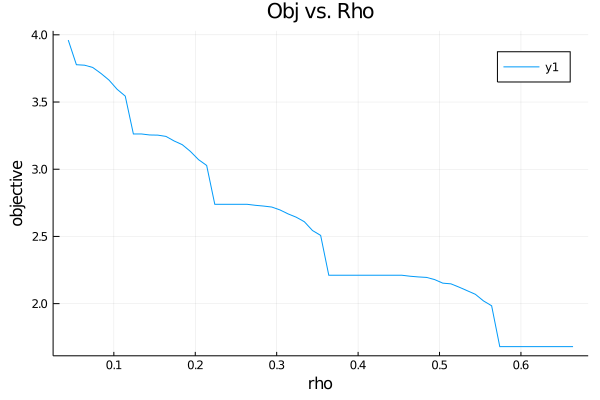

In [12]:
plot(rho_vals,obj_vals,xlabel="rho",ylabel="objective",title="Obj vs. Rho")

Based on my intuition, a reasonable value of $\rho$ is to assume that overall they are within one standard deviation away from their centers. In other words, have that $||a||_2 \leq 0.22$ 


In [17]:
solve_ro_knapsack(0.22)

Academic license - for non-commercial use only


(2.921385038049278, [0.0, -0.0, -0.0, 1.0, 0.0, 1.0, -0.0, -0.0, -0.0, 1.0, -0.0, 1.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0])

So our robust objective value is going to be 2.921